### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data Loading and Inspection

In [2]:
data = pd.read_csv("Student_Performance.csv")

data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [4]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


### Handling null values

In [5]:
data.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

### Handling duplicate values


In [6]:
data.duplicated().sum()

127

In [7]:
data[data.duplicated()]

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
915,9,52,No,5,9,48.0
1477,7,61,Yes,6,8,54.0
1601,5,99,No,7,5,89.0
1786,2,62,Yes,9,4,40.0
2026,5,87,Yes,6,7,74.0
...,...,...,...,...,...,...
9644,4,91,Yes,4,3,71.0
9940,8,95,No,5,2,90.0
9954,6,97,No,8,7,92.0
9966,1,41,No,7,3,12.0


In [8]:
data = data.drop_duplicates()

In [9]:
data.duplicated().sum()

0

In [10]:
data.shape

(9873, 6)

### Handling categorical  features

In [11]:
for col in data.columns:
    if data[col].dtype=='O':
        print(col,data[col].unique())

Extracurricular Activities ['Yes' 'No']


In [12]:
data['Extracurricular Activities'] = data['Extracurricular Activities'].map({"Yes":1,"No":0})

In [13]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


## Data Visualization

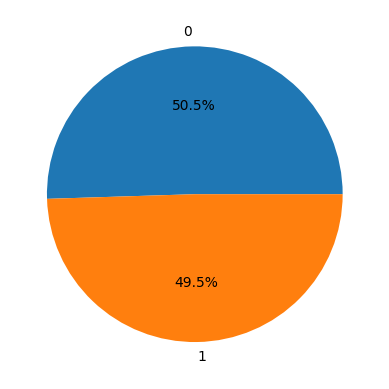

In [21]:
plt.pie(data['Extracurricular Activities'].value_counts(), labels = data["Extracurricular Activities"].value_counts().index, autopct = "%1.1f%%")
plt.show()

<BarContainer object of 9873 artists>

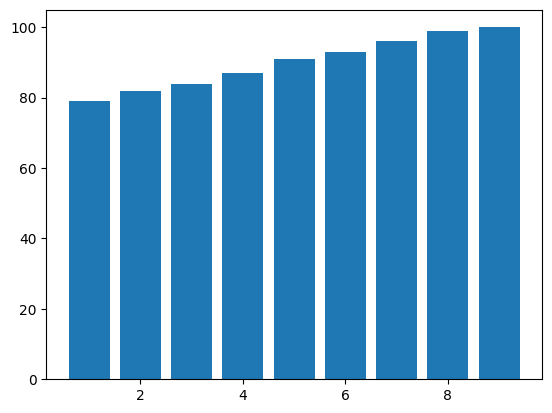

In [25]:
plt.bar(data["Hours Studied"], data["Performance Index"])

### splitting data into x and y

In [26]:
x = data.drop(['Performance Index'],axis=1)

y = data['Performance Index']

### Feature scaling

In [27]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

x = scale.fit_transform(x)
x.shape

(9873, 5)

### splitting data into train and test 

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test  =  train_test_split(x,y,test_size=0.25,random_state=42)

### Model deployment

### Linear regression

In [29]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()

linear.fit(x_train, y_train)

LinearRegression()

In [33]:
from sklearn.metrics import r2_score,mean_absolute_error

y_linear = linear.predict(x_test)

score = r2_score(y_test,y_linear)

mae = mean_absolute_error(y_test,y_linear)


print("r2 score = ",round(score,4))

print("mean absolute error = ",round(mae,4))

r2 score =  0.9883
mean absolute error =  1.6486


In [34]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()

x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [35]:
poly_linear = LinearRegression()
poly_linear.fit(x_train_poly,y_train)

LinearRegression()

In [37]:
y_poly_linear = poly_linear.predict(x_test_poly)

score = r2_score(y_test,y_poly_linear)

mae = mean_absolute_error(y_test,y_poly_linear)


print("r2 score = ",round(score,4))

print("root mean squared error = ",round(mae,4))

r2 score =  0.9883
root mean squared error =  1.6492


### Decision tree regression

In [38]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

dt.fit(x_train,y_train)


DecisionTreeRegressor()

In [39]:
y_dt = dt.predict(x_test)

score = r2_score(y_test,y_dt)

mae = mean_absolute_error(y_test,y_dt)


print("r2 score = ",round(score,4))

print("mean absolute error = ",round(mae,4))

r2 score =  0.9745
mean absolute error =  2.4364


### Random Forest Regressor

In [40]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(x_train, y_train)

RandomForestRegressor()

In [42]:
y_rf = rf.predict(x_test)

score = r2_score(y_test,y_rf)

mae = mean_absolute_error(y_test,y_rf)


print("r2 score = ",round(score,4))

print("mean absolute error = ",round(mae,4))

r2 score =  0.9845
mean absolute error =  1.9122
